<a href="https://colab.research.google.com/github/GioLomia/Machine_Learning_From_Scratch/blob/master/Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Linear Regression Algorithm from scratch.
**equation of a line: y=mx+b**

I am going to create a regression algorithm in pure python and numpy, from scratch. Using only math and my understanding of the theory behind it.
<br/> *Also Credit: SantDex for helpful video tutorials.*
<br/>Material to understand the concepts covered in this notebook: 
    [how to calculate linear regression slope and intercept](https://www.statisticshowto.datasciencecentral.com/probability-and-statistics/regression-analysis/find-a-linear-regression-equation/#FindaLinear)

In [0]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style

In [0]:
xs = np.array(random.sample(range(1, 200), 50),dtype=np.float64) #Generate unique data points.
ys = np.array([(0.66478*i+23.6123)-random.uniform(-17.5,17.5) for i in xs ],dtype=np.float64) #create the formula for the equation with some introduced noise.

In [108]:
print(xs[:5],ys[:5]) 

[ 35. 144.  43. 131. 157.] [ 37.79996749 117.06673292  57.35301775  98.3687953  129.48406169]


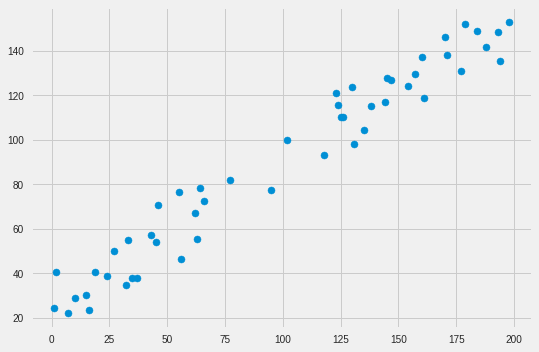

In [109]:
#Plotting the data points.
plt.scatter(xs,ys)
plt.show()

In [0]:
class LinearReg:
    def __init__(self,x,y):
        self.m=0
        self.b=0
        self.x=x
        self.y=y
#Function To calculate the slope and intercept of the line of the best fit
    def fit(self):
        
        x=self.x
        y=self.y
        self.m=((mean(x)*mean(y))-mean(x*y))/((mean(x)**2)-mean(x**2))
        self.b=mean(y)-m*mean(x)
    def predict(self,val):
        
        if type(val)!=list:
            return self.m*val+self.b
        else: 
            return [i*self.m + self.b for i in val]
    def s_error(self):
        return sum([((self.predict(self.x[i])-self.y[i])**2) for i in range(len(self.x))])
    def mean_error(self):
        return sum([((self.predict(self.x[i])-mean(self.y))**2) for i in range(len(self.x))])
    def accuracy(self):
        y_mean_line=mean(self.y)
        return 1-self.s_error()/self.mean_error()


In [111]:

model=LinearReg(xs,ys) #initialize the model and pass in the data
model.fit() # generate the line of best fit according to the model
print('Accuracy: '+ str(model.accuracy()))
pred_set=np.array([30,82,45,201])
prediction=model.predict(pred_set) #predict the data points 

Accuracy: 0.921316859473684


In [0]:
extension=np.linspace(0,210,210)
pred_line=extension*model.m+model.b

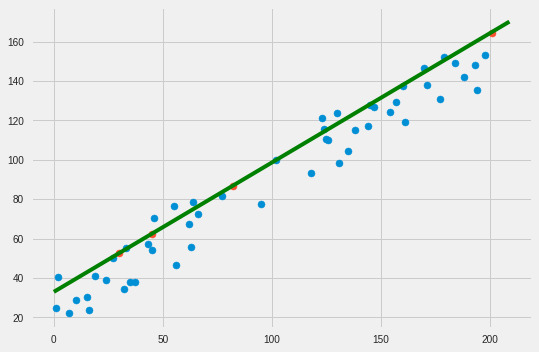

In [113]:
style.use('fivethirtyeight')
plt.scatter(xs,ys)
plt.plot(pred_line,'-g')
plt.scatter(pred_set,prediction)
plt.show()